In [186]:
import os
import features
import numpy as np
import skimage.io
import csv
import re
from collections import namedtuple
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score
from sklearn.cross_validation import train_test_split, LabelKFold, cross_val_score
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [187]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Extracting Data Set

In [188]:
Sample = namedtuple('Sample', ['path','label','vector'])

def map_file_path_to_number(file_path):
    for label in LABELS:
        if label in file_path:
            return labels_to_number[label]
    return -1

def map_row_to_sample(csv_row):
    return Sample(
        path=row[0],
        label=map_file_path_to_number(row[0]),
        vector=[float(x) for x in row[2:]]
    )

vectors_dump_file = open('gaze_vectors_with_failures.csv', 'rb')
vectors_and_failures = list(csv.reader(vectors_dump_file))
multiple_detections = joblib.load('samples-with-multi-detections.pkl');

vectors_dump_file_2 = open('gaze_vectors_with_failures_2.csv', 'rb')
vectors_and_failures_2 = list(csv.reader(vectors_dump_file_2))

In [189]:
LABELS = ['top_left', 'top_right', 'bot_left', 'bot_right']
labels_to_number = dict(zip(LABELS, range(len(LABELS))))
samples = [map_row_to_sample(row) for row in vectors_and_failures if not row[1] and row[0] not in multiple_detections]
X = np.array([s.vector for s in samples])
Y = np.array([s.label for s in samples])

# Training 

In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [191]:
def classification_performance(clf, X, Y):
    results = clf.predict(X)
    print "Recall for each class:"
    print recall_score(Y, results, average=None)

    print ""
    print "Accuracy:"
    print clf.score(X, Y)

    # Compute confusion matrix
    cm = confusion_matrix(Y, results)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## 10 Trees

In [192]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, Y_train)

### Classification Performance on Training Data

Recall for each class:
[ 0.99870926  0.99760356  0.99672965  0.99541635]

Accuracy:
0.997190517998


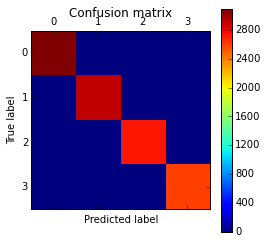

In [193]:
classification_performance(clf, X_train, Y_train)

### Classification Performance on Testing Data

Recall for each class:
[ 0.88531187  0.85323034  0.85117302  0.8174305 ]

Accuracy:
0.852762923351


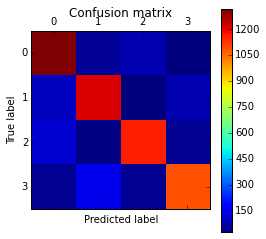

In [194]:
classification_performance(clf, X_test, Y_test)

## Gradient Boosted Trees

Recall for each class:
[ 1.  1.  1.  1.]

Accuracy:
1.0


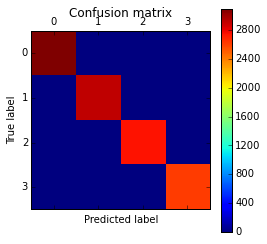

Recall for each class:
[ 0.89134809  0.88061798  0.89076246  0.89181067]

Accuracy:
0.888591800357


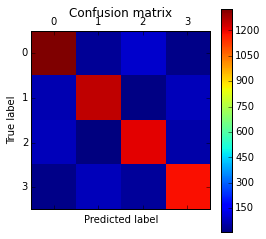

In [195]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=10, random_state=0).fit(X_train, Y_train)
clf = clf.fit(X_train, Y_train)
classification_performance(clf, X_train, Y_train)
classification_performance(clf, X_test, Y_test)

## AdaBoost Classifier

Recall for each class:
[ 0.69377218  0.68298528  0.70494186  0.65889992]

Accuracy:
0.685689201054


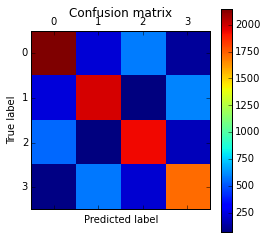

Recall for each class:
[ 0.66867874  0.68469101  0.72727273  0.64613073]

Accuracy:
0.681639928699


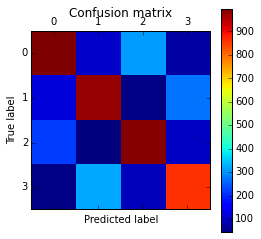

In [196]:
clf = AdaBoostClassifier(n_estimators=100,learning_rate=1.0, random_state=0)
clf = clf.fit(X_train, Y_train)
classification_performance(clf, X_train, Y_train)
classification_performance(clf, X_test, Y_test)

## 100 Trees

Recall for each class:
[ 1.  1.  1.  1.]

Accuracy:
1.0


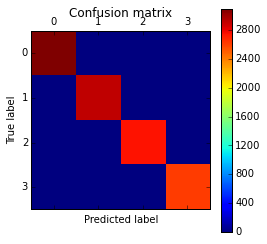

Recall for each class:
[ 0.90409121  0.91011236  0.90835777  0.89105935]

Accuracy:
0.903565062389


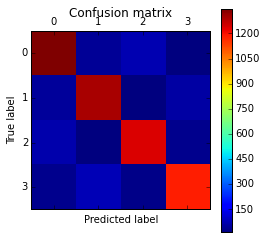

In [197]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, Y_train)
classification_performance(clf, X_train, Y_train)
classification_performance(clf, X_test, Y_test)

## 200 Trees

Recall for each class:
[ 1.  1.  1.  1.]

Accuracy:
1.0


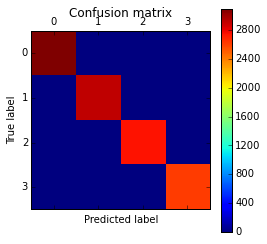

Recall for each class:
[ 0.90409121  0.90589888  0.90542522  0.89256198]

Accuracy:
0.902139037433


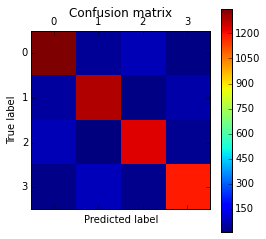

In [198]:
clf = RandomForestClassifier(n_estimators=200)
clf = clf.fit(X_train, Y_train)
classification_performance(clf, X_train, Y_train)
classification_performance(clf, X_test, Y_test)

## 100 Trees with Auto Weighted

Recall for each class:
[ 1.  1.  1.  1.]

Accuracy:
1.0


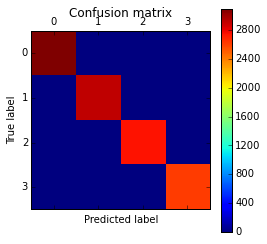

Recall for each class:
[ 0.9047619   0.90168539  0.9127566   0.89030804]

Accuracy:
0.902495543672


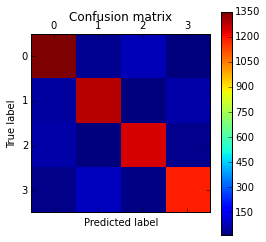

In [199]:
clf = RandomForestClassifier(n_estimators=100, class_weight="auto")
clf = clf.fit(X_train, Y_train)
classification_performance(clf, X_train, Y_train)
classification_performance(clf, X_test, Y_test)

Save current best classifier to file.

In [200]:
joblib.dump(clf, 'models/classifier.pkl');

## Removing samples with multiple detections

In [201]:
LABELS = ['top_left', 'top_right', 'bot_left', 'bot_right']
labels_to_number = dict(zip(LABELS, range(len(LABELS))))
samples = [map_row_to_sample(row) for row in vectors_and_failures if not row[1] and row[0] not in multiple_detections]
X = np.array([s.vector for s in samples])
Y = np.array([s.label for s in samples])

Recall for each class:
[ 1.  1.  1.  1.]

Accuracy:
1.0


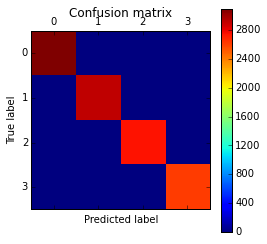

Recall for each class:
[ 0.898055    0.90589888  0.90615836  0.89105935]

Accuracy:
0.900356506239


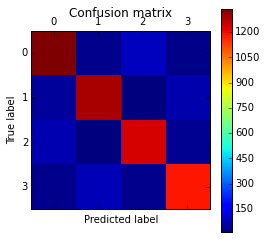

In [202]:
clf = RandomForestClassifier(n_estimators=100, class_weight="auto")
clf = clf.fit(X_train, Y_train)
classification_performance(clf, X_train, Y_train)
classification_performance(clf, X_test, Y_test)

In [203]:
joblib.dump(clf, 'models/classifier-cleaned.pkl');

## Shallow Classifiers

Recall for each class:
[ 0.64246531  0.61109209  0.57303779  0.4289534 ]

Accuracy:
0.568568920105


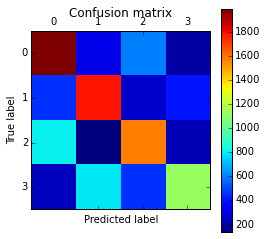

Recall for each class:
[ 0.61032864  0.61025281  0.58284457  0.45229151]

Accuracy:
0.566131907308


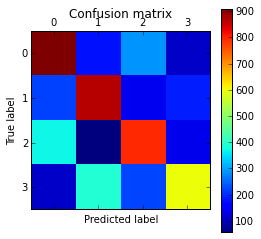

In [204]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2)
clf = clf.fit(X_train, Y_train)
classification_performance(clf, X_train, Y_train)
classification_performance(clf, X_test, Y_test)

Recall for each class:
[ 0.95546951  0.95994522  0.95712209  0.9526356 ]

Accuracy:
0.95636523266


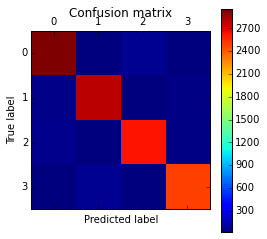

Recall for each class:
[ 0.82159624  0.84480337  0.85117302  0.83921863]

Accuracy:
0.838859180036


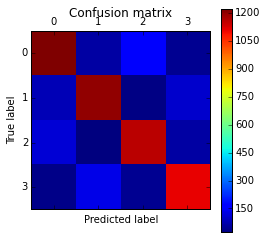

In [205]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10)
clf = clf.fit(X_train, Y_train)
classification_performance(clf, X_train, Y_train)
classification_performance(clf, X_test, Y_test)

# Top/Bottom

In [206]:
LABELS = ['top', 'bot']
labels_to_number = dict(zip(LABELS, range(len(LABELS))))
samples = [map_row_to_sample(row) for row in vectors_and_failures if not row[1]]
X = np.array([s.vector for s in samples])
Y = np.array([s.label for s in samples])

In [207]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
clf = RandomForestClassifier(n_estimators=100, class_weight="auto")
clf = clf.fit(X_train, Y_train)

## Classification Performance on Training Data

Recall for each class:
[ 1.  1.]

Accuracy:
1.0


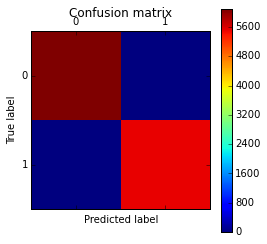

In [208]:
classification_performance(clf, X_train, Y_train)

## Classification Performance on Testing Data

Recall for each class:
[ 0.94326476  0.92754689]

Accuracy:
0.935810221525


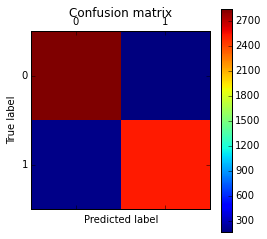

In [209]:
classification_performance(clf, X_test, Y_test)

In [210]:
joblib.dump(clf, 'models/top-bot.pkl');

# Left/Right

In [ ]:
LABELS = ['top', 'bot']
labels_to_number = dict(zip(LABELS, range(len(LABELS))))
samples = [map_row_to_sample(row) for row in vectors_and_failures if not row[1]]
X = np.array([s.vector for s in samples])
Y = np.array([s.label for s in samples])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
clf = RandomForestClassifier(n_estimators=200, class_weight="auto")
clf = clf.fit(X_train, Y_train)

## Classification Performance on Training Data

In [ ]:
classification_performance(clf, X_train, Y_train)

## Classification Performance on Testing Data

In [ ]:
classification_performance(clf, X_test, Y_test)

In [ ]:
joblib.dump(clf, 'models/left-right.pkl');

## Feature Reducing

Attempting to remove the non-normalized features such as mean_x, mean_y, stdev_x, stdev_y

In [ ]:
LABELS = ['top_left', 'top_right', 'bot_left', 'bot_right']
labels_to_number = dict(zip(LABELS, range(len(LABELS))))
samples = [map_row_to_sample(row) for row in vectors_and_failures if not row[1]]
X = np.array([s.vector[0:-4] for s in samples])
Y = np.array([s.label for s in samples])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, class_weight="auto")
clf = clf.fit(X_train, Y_train)
classification_performance(clf, X_train, Y_train)
classification_performance(clf, X_test, Y_test)

In [ ]:
joblib.dump(clf, 'models/less-features.pkl');

# Leave One Participant out Training

In [ ]:
LABELS = ['top_left', 'top_right', 'bot_left', 'bot_right']
labels_to_number = dict(zip(LABELS, range(len(LABELS))))
samples = [map_row_to_sample(row) for row in vectors_and_failures if not row[1]]
X = np.array([s.vector for s in samples])
Y = np.array([s.label for s in samples])

In [ ]:
def path_to_participant_label(file_path):
    p = re.compile('p\d+')
    str_label = p.search(file_path).group() # "p<x>"
    return int(str_label[1:]) # "p<x>" -> <x>

participant_labels = np.array([path_to_participant_label(s.path) for s in samples])

In [ ]:
num_participant_labels = len(set(participant_labels))
label_kfold = LabelKFold(participant_labels, n_folds=num_participant_labels)
clf = RandomForestClassifier(n_estimators=100, class_weight="auto")
scores = cross_val_score(clf, X, Y, cv=label_kfold)

In [ ]:
plt.boxplot(scores)

In [ ]:
print "Max accuracy:", np.max(scores)
print "Min accuracy:", np.min(scores)

## Confusion Matrices for each left out particpant

In [ ]:
for train_index, test_index in label_kfold:
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    

    left_out_participant = list(set(participant_labels[test_index]))[0]
    print "Leaving out participant {}".format(left_out_participant)

    clf = clf.fit(X_train, Y_train)
    classification_performance(clf, X_train, Y_train)
    classification_performance(clf, X_test, Y_test)

## Secondary Data Set

### Isolated

In [ ]:
LABELS = ['top_left', 'top_right', 'bot_left', 'bot_right', 'center']
labels_to_number = dict(zip(LABELS, range(len(LABELS))))
samples = [map_row_to_sample(row) for row in vectors_and_failures_2 if not row[1] and row[0] not in multiple_detections]
X = np.array([s.vector for s in samples])
Y = np.array([s.label for s in samples])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

#### Performance on self

In [ ]:
clf = RandomForestClassifier(n_estimators=100, class_weight="auto")
clf = clf.fit(X_train, Y_train)
classification_performance(clf, X_train, Y_train)
classification_performance(clf, X_test, Y_test)

#### Performance on previous set

In [ ]:
samples = [map_row_to_sample(row) for row in vectors_and_failures if not row[1] and row[0] not in multiple_detections]
X_test = np.array([s.vector for s in samples])
Y_test = np.array([s.label for s in samples])
classification_performance(clf, X_test, Y_test)

### Added to previous set

In [ ]:
LABELS = ['top_left', 'top_right', 'bot_left', 'bot_right', 'center']
labels_to_number = dict(zip(LABELS, range(len(LABELS))))
vectors_and_failures_combined = vectors_and_failures + vectors_and_failures_2
samples = [map_row_to_sample(row) for row in vectors_and_failures_combined if not row[1] and row[0] not in multiple_detections]
X = np.array([s.vector for s in samples])
Y = np.array([s.label for s in samples])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, class_weight="auto")
clf = clf.fit(X_train, Y_train)
classification_performance(clf, X_train, Y_train)
classification_performance(clf, X_test, Y_test)

### Removing Center Samples and Label

In [ ]:
LABELS = ['top_left', 'top_right', 'bot_left', 'bot_right']
labels_to_number = dict(zip(LABELS, range(len(LABELS))))
vectors_and_failures_combined = vectors_and_failures + vectors_and_failures_2
samples = [map_row_to_sample(row) for row in vectors_and_failures_combined if not row[1] and row[0] not in multiple_detections]
samples = [s for s in samples if s.label != -1]
X = np.array([s.vector for s in samples])
Y = np.array([s.label for s in samples])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, class_weight="auto")
clf = clf.fit(X_train, Y_train)
classification_performance(clf, X_train, Y_train)
classification_performance(clf, X_test, Y_test)